In [103]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd


from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm
import sklearn
import statsmodels.api as sm


%matplotlib inline






In [145]:
data = pd.read_csv('go_track_tracks.csv', header = 0, sep=',')
data.head()

sample = data.values[:,3]
print (len(sample))





163


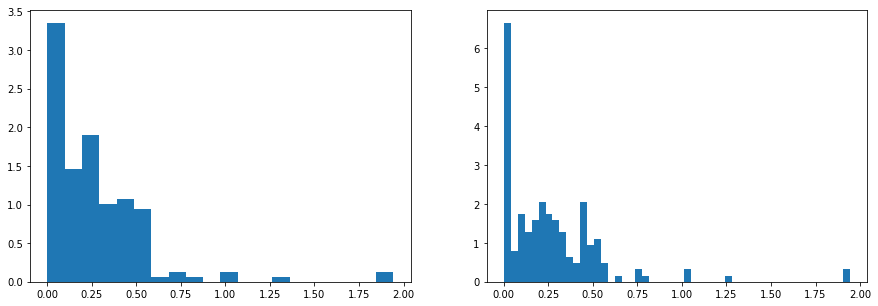

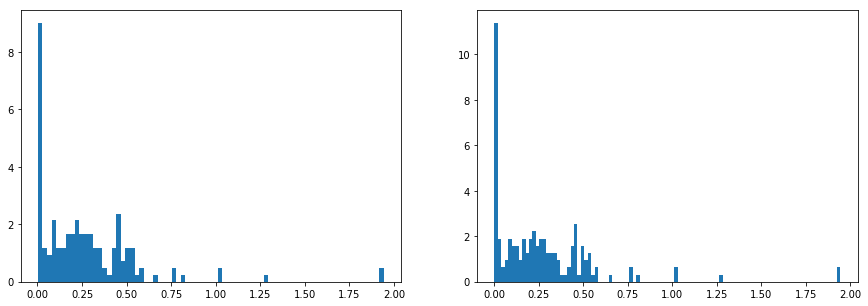

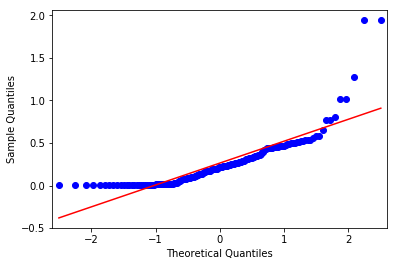

In [104]:
def plot_hists(sample):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    _ = plt.hist(sample, bins=20, normed=True)
    plt.subplot(122)
    _ = plt.hist(sample, bins=50, normed=True)
    plt.show()    
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    _ = plt.hist(sample, bins=75, normed=True)
    plt.subplot(122)
    _ = plt.hist(sample, bins=100, normed=True)
    plt.show()
    sm.qqplot(sample, line='r')
    plt.show()
plot_hists(sample)




Предположение: выборка из $\Gamma$-распределения

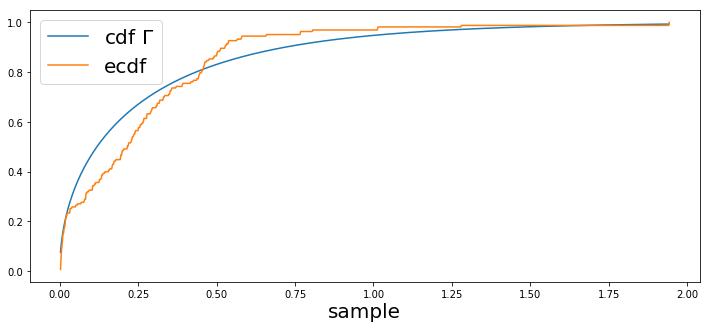

In [116]:
new_sample = [x for x in sample if (x!=0)]
s = sample.mean() - np.mean([np.log(x) for x in new_sample])
k = (3 - s + ((s**3 - 3)**2 + 24 * s)**(1/2))/ (12*s)
theta = sample.mean() / k

grid = np.linspace(sample.min(), sample.max(), 1000)

plt.figure(figsize=(12, 5))
plt.plot(grid, sps.gamma(a=k, scale= theta).cdf(grid), label='cdf $\Gamma$')
plt.plot(grid, ECDF(sample)(grid), label='ecdf')
plt.legend(fontsize=20)
plt.xlabel('sample', fontsize=20)
plt.show()





In [125]:
bootstrap_sample = sklearn.utils.resample(sample, n_samples=1000)





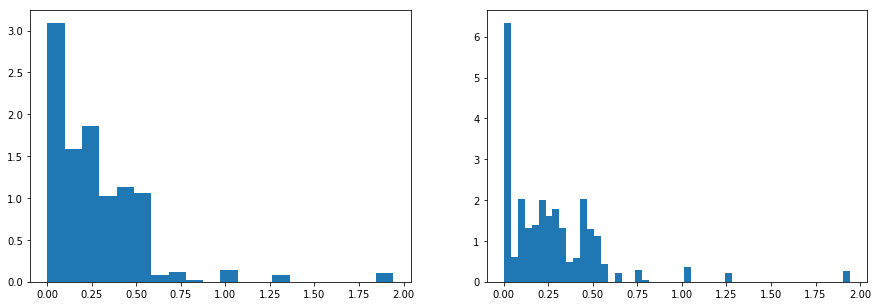

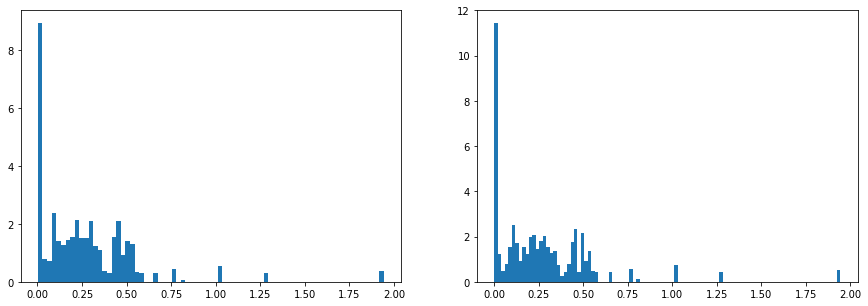

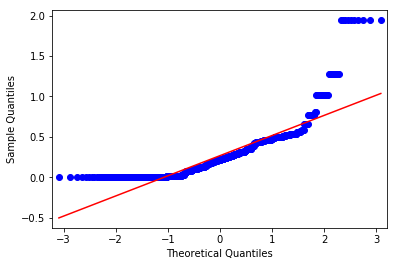

In [126]:
plot_hists(bootstrap_sample)




In [127]:
def chi_sq(distr, sample, K):
    K = 6
    frequance = np.array([np.sum([1 for x in sample if 
                  ((x > np.percentile(sample, j * 100 / K)) 
                   and (x <= np.percentile(sample, (j+1) * 100 / K))) ]) for j in range(K)])
    bounds = np.array([np.percentile(sample, q=i * 100 / K) for i in range(K + 1)])
    theory_fr = np.array([distr(bounds[i + 1]) - distr(bounds[i]) for i in range(K)]) * np.sum(frequance)
    print (frequance)
    return sps.chisquare(frequance, theory_fr, ddof=K)    




In [131]:
chi_sq(sps.gamma(a=k, scale= theta).cdf, bootstrap_sample, 8)




[163 167 165 171 163 164]


Power_divergenceResult(statistic=227.68103593626489, pvalue=nan)

In [138]:
shape,loc,scale = sps.pareto.fit(list(bootstrap_sample))
chi_sq(sps.mielke(k,s,loc=loc,scale=scale).cdf, bootstrap_sample, 8)





/home/riv/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:2289: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


[163 167 165 171 163 164]


Power_divergenceResult(statistic=371520172100.48462, pvalue=nan)

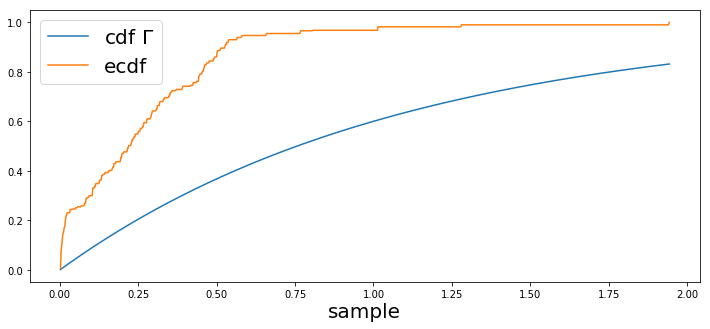

In [146]:
grid = np.linspace(bootstrap_sample.min(), bootstrap_sample.max(), 1000)

plt.figure(figsize=(12, 5))
plt.plot(grid, sps.pareto.cdf(shape, grid, loc=loc, scale=scale), label='cdf $\Gamma$')
plt.plot(grid, ECDF(bootstrap_sample)(grid), label='ecdf')
plt.legend(fontsize=20)
plt.xlabel('sample', fontsize=20)
plt.show()





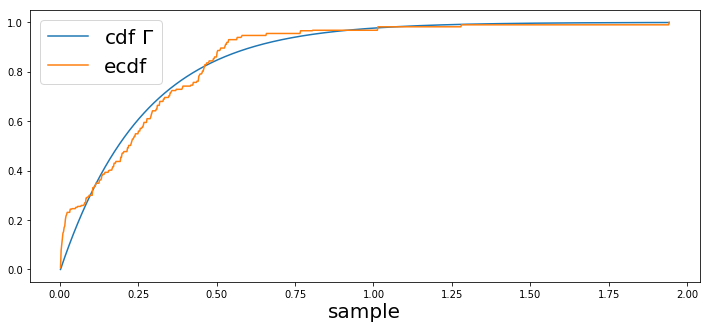

In [148]:
loc,scale = sps.expon.fit(list(bootstrap_sample))

grid = np.linspace(bootstrap_sample.min(), bootstrap_sample.max(), 1000)

plt.figure(figsize=(12, 5))
plt.plot(grid, sps.expon.cdf( grid, loc=loc, scale=scale), label='cdf $\Gamma$')
plt.plot(grid, ECDF(bootstrap_sample)(grid), label='ecdf')
plt.legend(fontsize=20)
plt.xlabel('sample', fontsize=20)
plt.show()




In [149]:
chi_sq(sps.expon(loc=loc,scale=scale).cdf, bootstrap_sample, 8)




[163 167 165 171 163 164]


Power_divergenceResult(statistic=427.50734212202121, pvalue=nan)

In [153]:
safe  = [x for x in bootstrap_sample if (x>0)]
sps.kstest(safe, 'expon')




KstestResult(statistic=0.51423420923867769, pvalue=0.0)

In [157]:
shape,scale, loc = sps.gamma.fit(safe)
sps.kstest(safe, 'gamma',args=(shape,scale, loc))




KstestResult(statistic=0.11142485596504387, pvalue=2.8651081507291565e-11)

In [158]:
shape,loc,scale = sps.genpareto.fit(list(bootstrap_sample))
sps.kstest(safe, 'genpareto',args=(shape,scale, loc))




/home/riv/.local/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1732: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/home/riv/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1033: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/home/riv/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:2289: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


KstestResult(statistic=0.56000000000000005, pvalue=0.0)

In [159]:
loc,scale = sps.gilbrat.fit(list(bootstrap_sample))
sps.kstest(safe, 'gilbrat',args=(scale, loc))





KstestResult(statistic=nan, pvalue=nan)

In [160]:
loc,scale = sps.halfcauchy.fit(list(bootstrap_sample))
sps.kstest(safe, 'halfcauchy',args=(scale, loc))





/home/riv/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:2289: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


KstestResult(statistic=0.48588568529432441, pvalue=0.0)

In [161]:
beta,loc,scale = sps.halfgennorm.fit(list(bootstrap_sample))
sps.kstest(safe, 'halfgennorm',args=(scale, loc))





KstestResult(statistic=0.99999950466694676, pvalue=0.0)

In [162]:
c, loc,scale = sps.lomax.fit(list(bootstrap_sample))
sps.kstest(safe, 'lomax',args=(scale, loc))




/home/riv/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:2289: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


KstestResult(statistic=0.14145887302525403, pvalue=0.0)

In [163]:
shape,loc,scale = sps.pareto.fit(list(bootstrap_sample))
sps.kstest(safe, 'pareto',args=(shape,scale, loc))




/home/riv/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:2289: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


KstestResult(statistic=nan, pvalue=nan)

In [166]:
a,b,loc,scale = sps.reciprocal.fit(list(bootstrap_sample))
sps.kstest(safe, 'reciprocal',args=(a,b, loc,scale))




KstestResult(statistic=0.96599999999999997, pvalue=0.0)

In [168]:
b, loc, scale = sps.truncexpon.fit(list(bootstrap_sample))
sps.kstest(safe, 'truncexpon',args=(b, loc,scale))





KstestResult(statistic=0.51941983260246705, pvalue=0.0)

Выборка имеет гамма-распределение